In [90]:
!python -m spacy download pl_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 17.7/20.2 MB 110.7 MB/s eta 0:00:01

In [117]:
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt

In [92]:
MAIN_DATA = pd.read_csv("/content/dane5.csv")

In [93]:
df_twitter = MAIN_DATA.copy()
df_twitter

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Tue May 18 16:52:03 +0000 2021,NaN,NaN,NaN,0,1394697302728749068,NaN,NaN,NaN,...,2670,2474,16,NaN,Bartek Grzebalski 🇵🇱♥💪✝️,Bartek93794875,889206,NaN,NaN,False
1,NaN,Wed May 19 11:31:01 +0000 2021,NaN,NaN,https://tvn24.pl/biznes/z-kraju/praca-zdalna-w...,2,1394978896660078595,NaN,NaN,NaN,...,172417,93,500,Polska,TVN24 BiS,TVN24BiS,76779,NaN,http://tvn24bis.pl/,True
2,NaN,Tue May 18 17:46:25 +0000 2021,NaN,NaN,NaN,0,1394710981184475136,NaN,NaN,NaN,...,699,591,4,"Toruń, Polska",magda,Magdaiks,229241,NaN,NaN,False
3,NaN,Tue May 18 19:49:34 +0000 2021,NaN,NaN,NaN,0,1394741976038350849,NaN,NaN,NaN,...,1824,1771,15,NaN,Krzysztof 🇵🇱.,KrzysztofKando1,104046,NaN,NaN,False
4,NaN,Wed May 19 05:13:22 +0000 2021,NaN,NaN,NaN,0,1394883858701639684,NaN,NaN,NaN,...,262,353,9,NaN,Krzysztof Strojek,KKStrojek,47074,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,NaN,Thu May 13 11:03:58 +0000 2021,NaN,NaN,NaN,2,1392797762501156869,NaN,NaN,NaN,...,72,177,1,"him, aquarius",dominic,loveyoulikegod,3659,NaN,NaN,False
477,NaN,Thu May 13 09:50:02 +0000 2021,NaN,NaN,NaN,0,1392779156941856772,NaN,NaN,NaN,...,679,98,4,NaN,Marcin Pioskur,soipruk,18248,NaN,NaN,False
478,NaN,Thu May 13 08:16:57 +0000 2021,NaN,NaN,https://alleopole.pl/ogloszenie/33861/rekruter...,0,1392755734404812800,NaN,NaN,NaN,...,173,952,2,NaN,Wojciech Kac,wojciech_kac,41215,NaN,NaN,False
479,NaN,Thu May 13 11:34:56 +0000 2021,NaN,NaN,NaN,0,1392805558479171586,NaN,NaN,NaN,...,527,566,14,NaN,Obserwatorr,ObiektywnyObse2,207633,NaN,NaN,False


In [94]:
df_twitter2 = df_twitter.copy()

In [95]:
df_twitter2

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Tue May 18 16:52:03 +0000 2021,NaN,NaN,NaN,0,1394697302728749068,NaN,NaN,NaN,...,2670,2474,16,NaN,Bartek Grzebalski 🇵🇱♥💪✝️,Bartek93794875,889206,NaN,NaN,False
1,NaN,Wed May 19 11:31:01 +0000 2021,NaN,NaN,https://tvn24.pl/biznes/z-kraju/praca-zdalna-w...,2,1394978896660078595,NaN,NaN,NaN,...,172417,93,500,Polska,TVN24 BiS,TVN24BiS,76779,NaN,http://tvn24bis.pl/,True
2,NaN,Tue May 18 17:46:25 +0000 2021,NaN,NaN,NaN,0,1394710981184475136,NaN,NaN,NaN,...,699,591,4,"Toruń, Polska",magda,Magdaiks,229241,NaN,NaN,False
3,NaN,Tue May 18 19:49:34 +0000 2021,NaN,NaN,NaN,0,1394741976038350849,NaN,NaN,NaN,...,1824,1771,15,NaN,Krzysztof 🇵🇱.,KrzysztofKando1,104046,NaN,NaN,False
4,NaN,Wed May 19 05:13:22 +0000 2021,NaN,NaN,NaN,0,1394883858701639684,NaN,NaN,NaN,...,262,353,9,NaN,Krzysztof Strojek,KKStrojek,47074,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,NaN,Thu May 13 11:03:58 +0000 2021,NaN,NaN,NaN,2,1392797762501156869,NaN,NaN,NaN,...,72,177,1,"him, aquarius",dominic,loveyoulikegod,3659,NaN,NaN,False
477,NaN,Thu May 13 09:50:02 +0000 2021,NaN,NaN,NaN,0,1392779156941856772,NaN,NaN,NaN,...,679,98,4,NaN,Marcin Pioskur,soipruk,18248,NaN,NaN,False
478,NaN,Thu May 13 08:16:57 +0000 2021,NaN,NaN,https://alleopole.pl/ogloszenie/33861/rekruter...,0,1392755734404812800,NaN,NaN,NaN,...,173,952,2,NaN,Wojciech Kac,wojciech_kac,41215,NaN,NaN,False
479,NaN,Thu May 13 11:34:56 +0000 2021,NaN,NaN,NaN,0,1392805558479171586,NaN,NaN,NaN,...,527,566,14,NaN,Obserwatorr,ObiektywnyObse2,207633,NaN,NaN,False


In [96]:
top_5_tweets = df_twitter2.sort_values(by="favorite_count", ascending=False).head(5)
for tweet in top_5_tweets["text"]:
    print(tweet)

Kochani, mamy to! Udało mi się załatwić sesję zdalną dla mojego rocznika 😩❤ https://t.co/BRBpHGPHy0
Zdalna szkoła nie zastąpi interakcji z nauczycielem i rówieśnikami. 
Teleporady nie zastąpią leczenia. 
Izolacja i kwarantanna nie może z nami zostać. https://t.co/6jKVCH3Pbe
InPost zaliczył u mnie mocnego plusika, bo oferuje dla pracowników biurowych (nie wiem jak z innymi) darmowe konsultacje psychologa i psychoterapeuty przez jakiś tam okres, w związku z pracą zdalną i ogółem funkcjonowaniem w pandemii, piękna sprawa
Kocham pracę zdalną, bo mogę siedzieć w krótkich spodenkach i bluzie, albo w ogóle w piżamie, a wstanie do pracy to metr od łóżka i włączenie sprzętu służbowego 🥵
Gdy dziecko ma zdalną plastykę, a zapomnieliście wziąć do babci pędzelki do farb... 😁💪 https://t.co/JMRau8UHwP


In [97]:
top_5_retweets = df_twitter2.sort_values(by="retweet_count", ascending=False).head(5)
for tweet in top_5_retweets["text"]:
    print(tweet)

Zdalna szkoła nie zastąpi interakcji z nauczycielem i rówieśnikami. 
Teleporady nie zastąpią leczenia. 
Izolacja i kwarantanna nie może z nami zostać. https://t.co/6jKVCH3Pbe
Zdalna szkoła nie zastąpi interakcji z nauczycielem i rówieśnikami. 
Teleporady nie zastąpią leczenia. 
Izolacja i kwarantanna nie może z nami zostać. https://t.co/6jKVCH3Pbe
Zdalna szkoła nie zastąpi interakcji z nauczycielem i rówieśnikami. 
Teleporady nie zastąpią leczenia. 
Izolacja i kwarantanna nie może z nami zostać. https://t.co/6jKVCH3Pbe
Zdalna szkoła nie zastąpi interakcji z nauczycielem i rówieśnikami. 
Teleporady nie zastąpią leczenia. 
Izolacja i kwarantanna nie może z nami zostać. https://t.co/6jKVCH3Pbe
Zdalna szkoła nie zastąpi interakcji z nauczycielem i rówieśnikami. 
Teleporady nie zastąpią leczenia. 
Izolacja i kwarantanna nie może z nami zostać. https://t.co/6jKVCH3Pbe


In [98]:
not_sensitive = df_twitter2[df_twitter2["possibly_sensitive"] == False]
for tweet in not_sensitive["text"]:
    print(tweet)

Rozpoczynamy ustawowe konsultacje przepisów regulujących pracę zdalną - poinformowała w środę wiceminister rozwoju, pracy i technologii Iwona Michałek.

https://t.co/hnPZd1vUMZ
Pandemia, praca zdalna i lockdowny spowodowały, że profilaktyka zdrowotna poszła w odstawkę. Po opanowaniu wirusa możemy spodziewać się dużych kolejek, https://t.co/3mgKsWROo2. do psychologa i psychiatry: https://t.co/DrJpgXc1nx
Praca zdalna po epidemii? Szef będzie musiał zapłacić za prąd i internet https://t.co/JCCXHNIHcA
Pandemia sprawiła, że biura opustoszały, a miejscem pracy stał się dom. Z danych  @EU_Eurostat wynika, że w 2020 w #UE 12,3% osób pomiędzy 15 a 64 pracowało z domu. Najwięcej w Finlandii, bo ponad 25%, w Polsce 8,9% (poniżej unijnej średniej). #pracazdalna https://t.co/vyyu3ZPquf
Asystentka (praca zdalna), Warszawa - https://t.co/DWsWf7A7MD
Szef będzie ci opłacał domowe rachunki za prąd i internet. Praca zdalna w końcu w Kodeksie pracy
https://t.co/x6ZsoiQW7j #bizblog
XXV ZDALNA SESJA RADY PO

In [99]:
df_twitter2["user_created_at"] = pd.to_datetime(df_twitter2["user_created_at"])

<ipython-input-99-c6aeda1820a1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_twitter2["user_created_at"] = pd.to_datetime(df_twitter2["user_created_at"])


In [100]:
earliest_date = df_twitter2["user_created_at"].min()

earliest_user_tweets = df_twitter2.loc[df_twitter2["user_created_at"] == earliest_date, "text"]
for text in earliest_user_tweets:
    print(text)

@antybodys @leweserce @Filaczynska Przecież od roku nauka jest zdalna. Edukacja powinna być w internecie, bo to na nim dzieci siedzą. A nie w szkole do której nawet nie chodzą.


In [101]:
followers = df_twitter2["user_followers_count"].max()
most_followed = df_twitter2.loc[df_twitter2["user_followers_count"] == followers, "text"]
for text in most_followed:
    print(text)

Szkolna przemoc też może być zdalna. Tyle, że trudniej ją zauważyć. Dorośli są bezradni #wyborcza https://t.co/4WTNPdzGYp


In [102]:
verified_users = df_twitter2[df_twitter2["user_verified"] == True]
for user in verified_users["user_name"]:
    print(user)

TVN24 BiS
Dziennik.pl
Business Insider Polska 🇵🇱
Forsal.pl
tvp.info 🇵🇱
Rzeczpospolita
Forsal.pl
Michał Kolanko
tvp.info 🇵🇱
Dziennik.pl
tvp.info 🇵🇱
Ministerstwo Rodziny i Polityki Społecznej
Google Cloud Poland
Jarosław Gowin
Forsal.pl
Andrzej Gut-Mostowy
Business Insider Polska 🇵🇱
Gazeta Wyborcza.pl
Radio ZET NEWS


In [103]:
df_twitter2["day_of_week"] = df_twitter2["created_at"].str[:3]
day_counts = df_twitter2["day_of_week"].value_counts()
most_frequent_day = day_counts.idxmax()
print(most_frequent_day)

Thu


In [16]:
#część3

In [104]:
nlp = spacy.load("pl_core_news_lg")

In [105]:
def extract_persons(text):
  doc = nlp(text)
  persons = [ent.text for ent in doc.ents if ent.label_ == "persName"]
  return persons if persons else None

def extract_places(text):
  doc = nlp(text)
  places = [ent.text for ent in doc.ents if ent.label_ == "placeName"]
  return places if places else None

def extract_organizations(text):
  doc = nlp(text)
  organizations = [ent.text for ent in doc.ents if ent.label_ == "orgName"]
  return organizations if organizations else None

df_twitter2["persons"] = df_twitter2["text"].apply(extract_persons)
df_twitter2["places"] = df_twitter2["text"].apply(extract_places)
df_twitter2["organizations"] = df_twitter2["text"].apply(extract_organizations)

In [106]:
print(df_twitter2)

     coordinates                      created_at hashtags media  \
0            NaN  Tue May 18 16:52:03 +0000 2021      NaN   NaN   
1            NaN  Wed May 19 11:31:01 +0000 2021      NaN   NaN   
2            NaN  Tue May 18 17:46:25 +0000 2021      NaN   NaN   
3            NaN  Tue May 18 19:49:34 +0000 2021      NaN   NaN   
4            NaN  Wed May 19 05:13:22 +0000 2021      NaN   NaN   
..           ...                             ...      ...   ...   
476          NaN  Thu May 13 11:03:58 +0000 2021      NaN   NaN   
477          NaN  Thu May 13 09:50:02 +0000 2021      NaN   NaN   
478          NaN  Thu May 13 08:16:57 +0000 2021      NaN   NaN   
479          NaN  Thu May 13 11:34:56 +0000 2021      NaN   NaN   
480          NaN  Thu May 13 10:17:08 +0000 2021      NaN   NaN   

                                                  urls  favorite_count  \
0                                                  NaN               0   
1    https://tvn24.pl/biznes/z-kraju/praca-zdal

In [ ]:
#część4

In [118]:
plt.style.use('_mpl-gallery')

In [119]:
df_twitter2["day_of_week"] = df_twitter2["created_at"].str[:3]

In [120]:
day_of_week = df_twitter2["day_of_week"]
tweets_per_day = df_twitter2["day_of_week"].value_counts().reindex(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], fill_value=0)
tweets_count = tweets_per_day.values

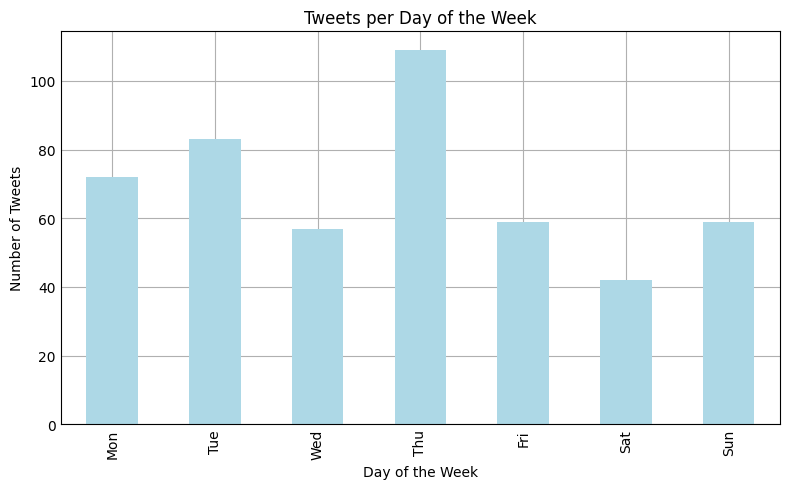

In [121]:
tweets_per_day.plot(kind="bar", color="lightblue", figsize=(8, 5))
plt.title("Tweets per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()